In [3]:
# Importing the necessary libraries for data cleaning, data preprocessing, data visualization
import numpy as np #linear algebra
import pandas as pd #to load files and perform tasks
import matplotlib.pyplot as plt #data visualization 
import seaborn as sns #data visualization
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [5]:
train = pd.read_csv('/content/Property_train.csv')
test = pd.read_csv('/content/Property_test_share.csv')

In [ ]:
train.head() #displaying the first 5 rows of train dataset

,Junk,InteriorsStyle,PriceIndex8,ListDate,Material,PriceIndex9,Agency,AreaIncomeType,EnvRating,PriceIndex7,ExpeditedListing,PriceIndex4,PriceIndex1,PriceIndex6,PRIMEUNIT,Channel,Zip,InsurancePremiumIndex,PlotType,Architecture,PriceIndex3,Region,PriceIndex5,SubModel,Facade,State,NormalisedPopulation,BuildYear,RegionType,PropertyAge,PriceIndex2
0,0,6LLJ,14674.0,9/7/2010,UT7W,8270,CAT3,B,missing,13143.0,0,14224.0,9217.0,10387.0,missing,Direct,21075,623,WHBI,I3Z9,13108.0,A,9022.0,6E9G,GREEN,MD,42077,2008,A,2,10692.0
1,1,XZ9F,4172.0,1/7/2009,PRN0,3890,CAT2,B,missing,3461.0,0,4404.0,2958.0,3400.0,missing,Direct,73129,1689,WHBI,AVYP,3695.0,A,2742.0,FIVQ,SILVER,OK,77258,2002,A,7,3615.0
2,0,QWEV,8210.0,6/23/2010,A9RA,5900,CAT1,B,missing,6922.0,0,8952.0,4568.0,4862.0,missing,Other,29697,2351,W62B,1M5X,7730.0,A,3768.0,4K0H,SILVER,SC,94514,2004,A,6,5805.0
3,0,MK2K,7309.0,3/19/2009,RRJQ,7460,OTHER,A,missing,6300.0,0,7460.0,5361.0,6305.0,missing,Agent,28273,1933,WLQ6,DKOO,6290.0,A,5370.0,ZLXY,WHITE,NC,82302,2002,C,7,6444.0
4,0,GK4G,9182.0,3/3/2010,HE5A,6400,OTHER,B,missing,8330.0,0,9846.0,5428.0,5718.0,missing,Other,29697,482,WHBI,KML6,8583.0,A,4803.0,FIVQ,SILVER,SC,49176,2007,B,3,6286.0


In [ ]:
test.head() #displaying the first 5 rows of test dataset

,InteriorsStyle,PriceIndex8,ListDate,Material,PriceIndex9,Agency,AreaIncomeType,EnvRating,PriceIndex7,ExpeditedListing,PriceIndex4,PriceIndex1,PriceIndex6,PRIMEUNIT,Channel,Zip,InsurancePremiumIndex,PlotType,Architecture,PriceIndex3,Region,PriceIndex5,SubModel,Facade,State,NormalisedPopulation,BuildYear,RegionType,PropertyAge,PriceIndex2
0,6LLJ,10645.0,9/22/2010,ZCI3,6015,CAT3,A,missing,9568.0,0,12432.0,6986.0,7133.0,missing,Other,27407,728,WHBI,I3Z9,10860.0,B,5911.0,UA42,BLUE,NC,67549,2006,A,4,8311.0
1,QD0H,9891.0,3/12/2010,RRJQ,7625,OTHER,A,missing,8888.0,0,12173.0,5954.0,6544.0,missing,Agent,32219,1334,32T2,4GZ4,10166.0,A,5370.0,BUNS,BLUE,FL,56570,2004,B,6,7123.0
2,I7GR,8426.0,10/12/2009,ZCI3,6900,CAT2,B,missing,7911.0,0,9134.0,7407.0,7339.0,missing,Other,74135,754,WHBI,TP7R,8500.0,A,6862.0,8YTZ,BLACK,OK,51840,2008,A,1,7994.0
3,5KS5,9269.0,5/20/2010,PRN0,6475,CAT1,B,missing,7773.0,0,8500.0,4241.0,6143.0,missing,Other,80229,1373,WHBI,YIK5,7294.0,A,4872.0,FIVQ,GREEN,CO,83300,2005,A,5,5259.0
4,918O,5366.0,1/13/2009,C8A4,3960,CAT1,A,missing,4134.0,0,5211.0,3352.0,4506.0,missing,Direct,28625,2939,WHBI,YIK5,4120.0,A,3365.0,KT8F,BLACK,NC,95035,2003,A,6,4362.0


## Exploratory Data Analysis

###Data Cleaning

In [7]:
#looking into the shape of the dataset
print('No. of rows in train dataset : ', train.shape[0])
print('No. of columns in train dataset : ', train.shape[1])
print('No. of rows in test dataset : ', test.shape[0])
print('No. of columns in test dataset : ', test.shape[1])

No. of rows in train dataset :  62035
No. of columns in train dataset :  31
No. of rows in test dataset :  10948
No. of columns in test dataset :  30


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62035 entries, 0 to 62034
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Junk                   62035 non-null  int64 
 1   InteriorsStyle         62035 non-null  object
 2   PriceIndex8            62035 non-null  object
 3   ListDate               62035 non-null  object
 4   Material               62035 non-null  object
 5   PriceIndex9            62035 non-null  int64 
 6   Agency                 62035 non-null  object
 7   AreaIncomeType         62035 non-null  object
 8   EnvRating              62035 non-null  object
 9   PriceIndex7            62035 non-null  object
 10  ExpeditedListing       62035 non-null  int64 
 11  PriceIndex4            62035 non-null  object
 12  PriceIndex1            62035 non-null  object
 13  PriceIndex6            62035 non-null  object
 14  PRIMEUNIT              62035 non-null  object
 15  Channel            

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10948 entries, 0 to 10947
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   InteriorsStyle         10948 non-null  object
 1   PriceIndex8            10948 non-null  object
 2   ListDate               10948 non-null  object
 3   Material               10948 non-null  object
 4   PriceIndex9            10948 non-null  int64 
 5   Agency                 10948 non-null  object
 6   AreaIncomeType         10948 non-null  object
 7   EnvRating              10948 non-null  object
 8   PriceIndex7            10948 non-null  object
 9   ExpeditedListing       10948 non-null  int64 
 10  PriceIndex4            10948 non-null  object
 11  PriceIndex1            10948 non-null  object
 12  PriceIndex6            10948 non-null  object
 13  PRIMEUNIT              10948 non-null  object
 14  Channel                10948 non-null  object
 15  Zip                

From the info of the train dataset, we get to know that although the PriceIndex columns shows numerical data, but there datatype is object, this means there are some values which behaves as string.

In [ ]:
train['PriceIndex1'].astype('float')

ValueError: ignored

In [ ]:
test['PriceIndex1'].astype('float')

ValueError: ignored

The above error shows that in PriceIndex1, when trying to convert it into float dtype fails to cahnge it as, it contain any value which is  written as'$missing$' rather than $np.NaN$.

In [ ]:
#Looking the dataset for missing values
train.isnull().sum()

Junk                     0
InteriorsStyle           0
PriceIndex8              0
ListDate                 0
Material                 0
PriceIndex9              0
Agency                   0
AreaIncomeType           0
EnvRating                0
PriceIndex7              0
ExpeditedListing         0
PriceIndex4              0
PriceIndex1              0
PriceIndex6              0
PRIMEUNIT                0
Channel                  0
Zip                      0
InsurancePremiumIndex    0
PlotType                 0
Architecture             0
PriceIndex3              0
Region                   0
PriceIndex5              0
SubModel                 0
Facade                   0
State                    0
NormalisedPopulation     0
BuildYear                0
RegionType               0
PropertyAge              0
PriceIndex2              0
dtype: int64

In [ ]:
test.isnull().sum()

InteriorsStyle           0
PriceIndex8              0
ListDate                 0
Material                 0
PriceIndex9              0
Agency                   0
AreaIncomeType           0
EnvRating                0
PriceIndex7              0
ExpeditedListing         0
PriceIndex4              0
PriceIndex1              0
PriceIndex6              0
PRIMEUNIT                0
Channel                  0
Zip                      0
InsurancePremiumIndex    0
PlotType                 0
Architecture             0
PriceIndex3              0
Region                   0
PriceIndex5              0
SubModel                 0
Facade                   0
State                    0
NormalisedPopulation     0
BuildYear                0
RegionType               0
PropertyAge              0
PriceIndex2              0
dtype: int64

Initially we don't find any null values in the train data, but as we explore further, we find the null values are masked as 'missing' values.

In [8]:
for i in train.columns:
  if train[i].dtypes == 'O':
    print(i, ' -> ', train[i].nunique())

InteriorsStyle  ->  1036
PriceIndex8  ->  12686
ListDate  ->  516
Material  ->  134
Agency  ->  5
AreaIncomeType  ->  4
EnvRating  ->  3
PriceIndex7  ->  12078
PriceIndex4  ->  13006
PriceIndex1  ->  10053
PriceIndex6  ->  10863
PRIMEUNIT  ->  3
Channel  ->  3
PlotType  ->  13
Architecture  ->  33
PriceIndex3  ->  12309
Region  ->  3
PriceIndex5  ->  10011
SubModel  ->  831
Facade  ->  17
State  ->  37
RegionType  ->  5
PriceIndex2  ->  11010


In [9]:
for i in test.columns:
  if test[i].dtypes == 'O':
    print(i, ' -> ', test[i].nunique())

InteriorsStyle  ->  715
PriceIndex8  ->  6241
ListDate  ->  509
Material  ->  112
Agency  ->  4
AreaIncomeType  ->  4
EnvRating  ->  3
PriceIndex7  ->  6195
PriceIndex4  ->  6424
PriceIndex1  ->  5720
PriceIndex6  ->  5848
PRIMEUNIT  ->  3
Channel  ->  3
PlotType  ->  12
Architecture  ->  30
PriceIndex3  ->  6244
Region  ->  3
PriceIndex5  ->  5651
SubModel  ->  542
Facade  ->  17
State  ->  37
RegionType  ->  4
PriceIndex2  ->  5959


Leaving the PriceIndex one's columns aside we find that some columns have more than 10 unique values in them we will treat them differently rather than creating dummies for those having only 2 to 5 unique values.

In [10]:
cat_dtype = []
for i in train.columns:
  if (train[i].dtypes == 'O' and train[i].nunique()<10):
    cat_dtype.append(i)
for i in cat_dtype:
  print(i)
  print(train[i].value_counts())
  print('\n')

Agency
CAT1       21545
CAT2       19862
CAT3       10455
OTHER      10168
missing        5
Name: Agency, dtype: int64


AreaIncomeType
A          30565
B          28150
missing     2676
C            644
Name: AreaIncomeType, dtype: int64


EnvRating
missing    59092
GREEN       2875
RED           68
Name: EnvRating, dtype: int64


PRIMEUNIT
missing    59092
NO          2886
YES           57
Name: PRIMEUNIT, dtype: int64


Channel
Direct    34816
Other     14951
Agent     12268
Name: Channel, dtype: int64


Region
A          59869
B           2160
missing        6
Name: Region, dtype: int64


RegionType
A          51862
B           6861
C           3135
OTHER        172
missing        5
Name: RegionType, dtype: int64




In [11]:
cat_test_dtype = []
for i in test.columns:
  if (test[i].dtypes == 'O' and test[i].nunique()<10):
    cat_test_dtype.append(i)
for i in cat_test_dtype:
  print(i)
  print(test[i].value_counts())
  print('\n')

Agency
CAT1     3769
CAT2     3537
CAT3     1860
OTHER    1782
Name: Agency, dtype: int64


AreaIncomeType
A          5485
B          4854
missing     498
C           111
Name: AreaIncomeType, dtype: int64


EnvRating
missing    10472
GREEN        465
RED           11
Name: EnvRating, dtype: int64


PRIMEUNIT
missing    10472
NO           471
YES            5
Name: PRIMEUNIT, dtype: int64


Channel
Direct    6227
Other     2550
Agent     2171
Name: Channel, dtype: int64


Region
A          10529
B            416
missing        3
Name: Region, dtype: int64


RegionType
A        9166
B        1172
C         587
OTHER      23
Name: RegionType, dtype: int64




$EnvRating$ & $PRIMEUNIT$ have the most no. of missing values, hence cannot be used as relevant columns.

We will drop them further in the process.

In [12]:
price = []
for i in train.columns:
  if (i.startswith('Price') and (train[i].dtypes == 'O')):
    price.append(i)
print(price)
import re
pattern = re.compile('[\D]+')
for j in price:
  print(j)
  for i in range(train.shape[0]):
    matches = re.findall(pattern, train[j][i])
    for match in matches:
      if ((match == 'missing') or (match != '.')):
        train[j][i] = np.nan
  train[j] = train[j].astype('float')

['PriceIndex8', 'PriceIndex7', 'PriceIndex4', 'PriceIndex1', 'PriceIndex6', 'PriceIndex3', 'PriceIndex5', 'PriceIndex2']
PriceIndex8
PriceIndex7
PriceIndex4
PriceIndex1
PriceIndex6
PriceIndex3
PriceIndex5
PriceIndex2


In [13]:
price_test = []
for i in test.columns:
  if (i.startswith('Price') and (test[i].dtypes == 'O')):
    price_test.append(i)
print(price_test)
import re
pattern = re.compile('[\D]+')
for j in price_test:
  print(j)
  for i in range(test.shape[0]):
    matches = re.findall(pattern, test[j][i])
    for match in matches:
      if ((match == 'missing') or (match != '.')):
        test[j][i] = np.nan
  test[j] = test[j].astype('float')

['PriceIndex8', 'PriceIndex7', 'PriceIndex4', 'PriceIndex1', 'PriceIndex6', 'PriceIndex3', 'PriceIndex5', 'PriceIndex2']
PriceIndex8
PriceIndex7
PriceIndex4
PriceIndex1
PriceIndex6
PriceIndex3
PriceIndex5
PriceIndex2


In [14]:
train.isnull().sum()

Junk                       0
InteriorsStyle             0
PriceIndex8              272
ListDate                   0
Material                   0
PriceIndex9                0
Agency                     0
AreaIncomeType             0
EnvRating                  0
PriceIndex7              272
ExpeditedListing           0
PriceIndex4               14
PriceIndex1               14
PriceIndex6              272
PRIMEUNIT                  0
Channel                    0
Zip                        0
InsurancePremiumIndex      0
PlotType                   0
Architecture               0
PriceIndex3               14
Region                     0
PriceIndex5              272
SubModel                   0
Facade                     0
State                      0
NormalisedPopulation       0
BuildYear                  0
RegionType                 0
PropertyAge                0
PriceIndex2               14
dtype: int64

In [15]:
test.isnull().sum()

InteriorsStyle            0
PriceIndex8              43
ListDate                  0
Material                  0
PriceIndex9               0
Agency                    0
AreaIncomeType            0
EnvRating                 0
PriceIndex7              43
ExpeditedListing          0
PriceIndex4               4
PriceIndex1               4
PriceIndex6              43
PRIMEUNIT                 0
Channel                   0
Zip                       0
InsurancePremiumIndex     0
PlotType                  0
Architecture              0
PriceIndex3               4
Region                    0
PriceIndex5              43
SubModel                  0
Facade                    0
State                     0
NormalisedPopulation      0
BuildYear                 0
RegionType                0
PropertyAge               0
PriceIndex2               4
dtype: int64

We have successfully converted the PriceIndex columns which were showing object dtypes to float dtypes and changed the 'missing' values to np.NaN

In [16]:
miss_cols = []
for i in train.columns:
  s = np.where(train[i] == 'missing')
  s = list(s[0])
  if (len(s)>0):
    miss_cols.append(i)
print(miss_cols)
for col in miss_cols:
  train[col] = train[col].replace('missing', np.NaN)

['Agency', 'AreaIncomeType', 'EnvRating', 'PRIMEUNIT', 'Region', 'Facade', 'RegionType']


In [17]:
miss_cols_test = []
for i in test.columns:
  s = np.where(test[i] == 'missing')
  s = list(s[0])
  if (len(s)>0):
    miss_cols_test.append(i)
print(miss_cols_test)
for col in miss_cols_test:
  test[col] = test[col].replace('missing', np.NaN)

['AreaIncomeType', 'EnvRating', 'PRIMEUNIT', 'Region', 'Facade']


In [18]:
train.isnull().sum()

Junk                         0
InteriorsStyle               0
PriceIndex8                272
ListDate                     0
Material                     0
PriceIndex9                  0
Agency                       5
AreaIncomeType            2676
EnvRating                59092
PriceIndex7                272
ExpeditedListing             0
PriceIndex4                 14
PriceIndex1                 14
PriceIndex6                272
PRIMEUNIT                59092
Channel                      0
Zip                          0
InsurancePremiumIndex        0
PlotType                     0
Architecture                 0
PriceIndex3                 14
Region                       6
PriceIndex5                272
SubModel                     0
Facade                       5
State                        0
NormalisedPopulation         0
BuildYear                    0
RegionType                   5
PropertyAge                  0
PriceIndex2                 14
dtype: int64

In [19]:
test.isnull().sum()

InteriorsStyle               0
PriceIndex8                 43
ListDate                     0
Material                     0
PriceIndex9                  0
Agency                       0
AreaIncomeType             498
EnvRating                10472
PriceIndex7                 43
ExpeditedListing             0
PriceIndex4                  4
PriceIndex1                  4
PriceIndex6                 43
PRIMEUNIT                10472
Channel                      0
Zip                          0
InsurancePremiumIndex        0
PlotType                     0
Architecture                 0
PriceIndex3                  4
Region                       3
PriceIndex5                 43
SubModel                     0
Facade                       3
State                        0
NormalisedPopulation         0
BuildYear                    0
RegionType                   0
PropertyAge                  0
PriceIndex2                  4
dtype: int64

Now to got few more columns where the actual nan values were present.

We will deal with them later on finding the appropriate methods.

In [ ]:
train['ExpeditedListing'].value_counts()

0    60504
1     1531
Name: ExpeditedListing, dtype: int64

In [ ]:
test['ExpeditedListing'].value_counts()

0    10634
1      314
Name: ExpeditedListing, dtype: int64

*$ExpeditedListing$* - This column shows a rough idea of the property to be listed before it is actually declared *Junk* or not.

###Data Visualization

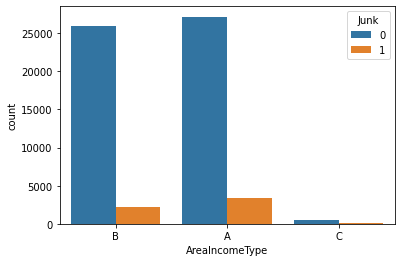

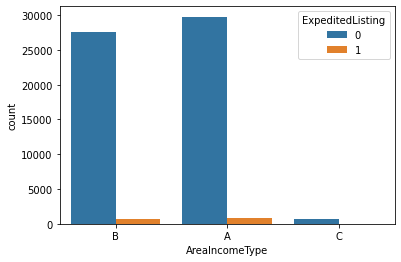

In [ ]:
sns.countplot(x = 'AreaIncomeType', hue = 'Junk', data = train)
plt.show()
sns.countplot(x = 'AreaIncomeType', hue = 'ExpeditedListing', data = train)
plt.show()

ExpeditedListing and Junk shows the same trend for the AreaIncomeType, although not so accurate but we can use it to fill na values in AreaIncomeType using ExpeditedListing.

In [ ]:
train.head()

,Junk,InteriorsStyle,PriceIndex8,ListDate,Material,PriceIndex9,Agency,AreaIncomeType,EnvRating,PriceIndex7,ExpeditedListing,PriceIndex4,PriceIndex1,PriceIndex6,PRIMEUNIT,Channel,Zip,InsurancePremiumIndex,PlotType,Architecture,PriceIndex3,Region,PriceIndex5,SubModel,Facade,State,NormalisedPopulation,BuildYear,RegionType,PropertyAge,PriceIndex2
0,0,6LLJ,14674.0,9/7/2010,UT7W,8270,CAT3,B,NaN,13143.0,0,14224.0,9217.0,10387.0,NaN,Direct,21075,623,WHBI,I3Z9,13108.0,A,9022.0,6E9G,GREEN,MD,42077,2008,A,2,10692.0
1,1,XZ9F,4172.0,1/7/2009,PRN0,3890,CAT2,B,NaN,3461.0,0,4404.0,2958.0,3400.0,NaN,Direct,73129,1689,WHBI,AVYP,3695.0,A,2742.0,FIVQ,SILVER,OK,77258,2002,A,7,3615.0
2,0,QWEV,8210.0,6/23/2010,A9RA,5900,CAT1,B,NaN,6922.0,0,8952.0,4568.0,4862.0,NaN,Other,29697,2351,W62B,1M5X,7730.0,A,3768.0,4K0H,SILVER,SC,94514,2004,A,6,5805.0
3,0,MK2K,7309.0,3/19/2009,RRJQ,7460,OTHER,A,NaN,6300.0,0,7460.0,5361.0,6305.0,NaN,Agent,28273,1933,WLQ6,DKOO,6290.0,A,5370.0,ZLXY,WHITE,NC,82302,2002,C,7,6444.0
4,0,GK4G,9182.0,3/3/2010,HE5A,6400,OTHER,B,NaN,8330.0,0,9846.0,5428.0,5718.0,NaN,Other,29697,482,WHBI,KML6,8583.0,A,4803.0,FIVQ,SILVER,SC,49176,2007,B,3,6286.0


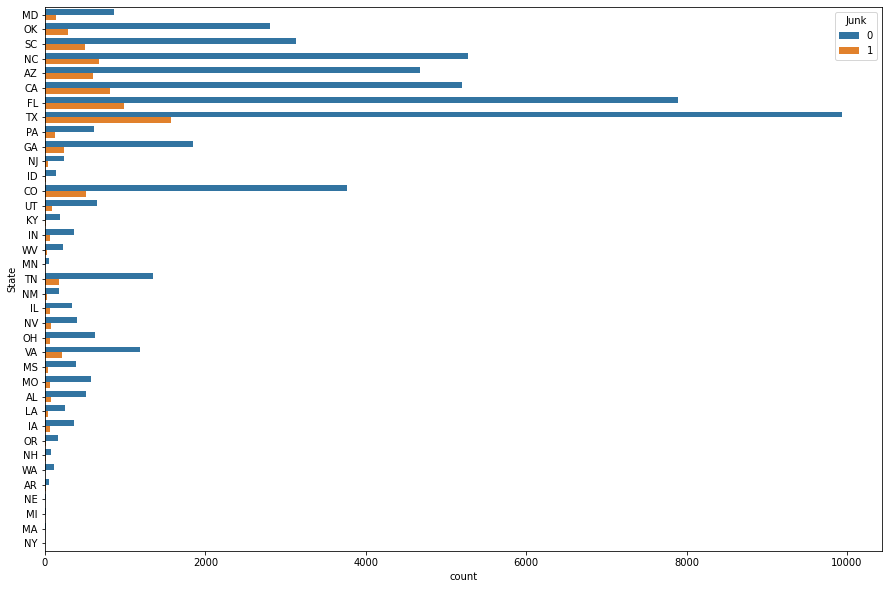

In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(y = 'State', hue = 'Junk', data = train)

The State columns shows only few of them are majorly contributing to the data.

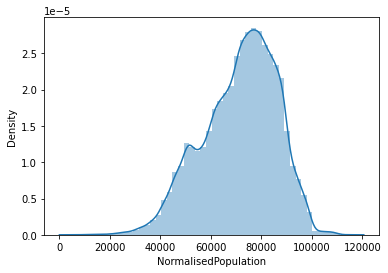

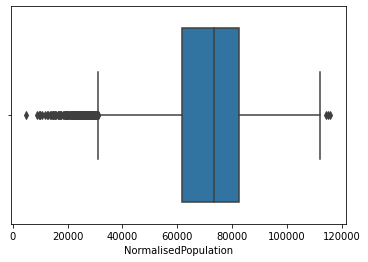

In [ ]:
sns.distplot(train['NormalisedPopulation'])
plt.show()
sns.boxplot(train['NormalisedPopulation'])
plt.show()

NormalisedPopulation is not playing any role in our data.



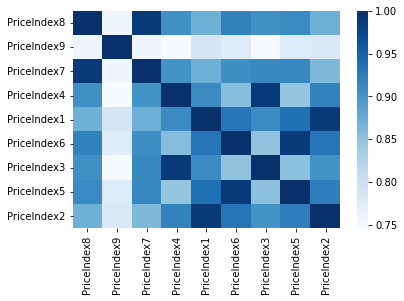

In [20]:
price_lst = []
for i in train.columns:
  if i.startswith('Price'):
    price_lst.append(i)
sns.heatmap(train[price_lst].corr(), cmap = 'Blues')

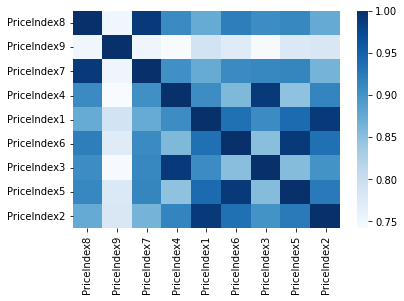

In [21]:
price_lst_test = []
for i in test.columns:
  if i.startswith('Price'):
    price_lst_test.append(i)
sns.heatmap(test[price_lst_test].corr(), cmap = 'Blues')

All the PriceIndex are highly correlated to each other and further can be treated as one average of all columns. 

In [ ]:
#fig, axes = plt.subplots(3, 3, constrained_layout = True, figsize = (15,10))
#k = 1
#for i in range(0,3):
#  for j in range(0,3):
#    sns.distplot(train['PriceIndex'+str(k)], ax = axes[i,j])
#    k = k+1

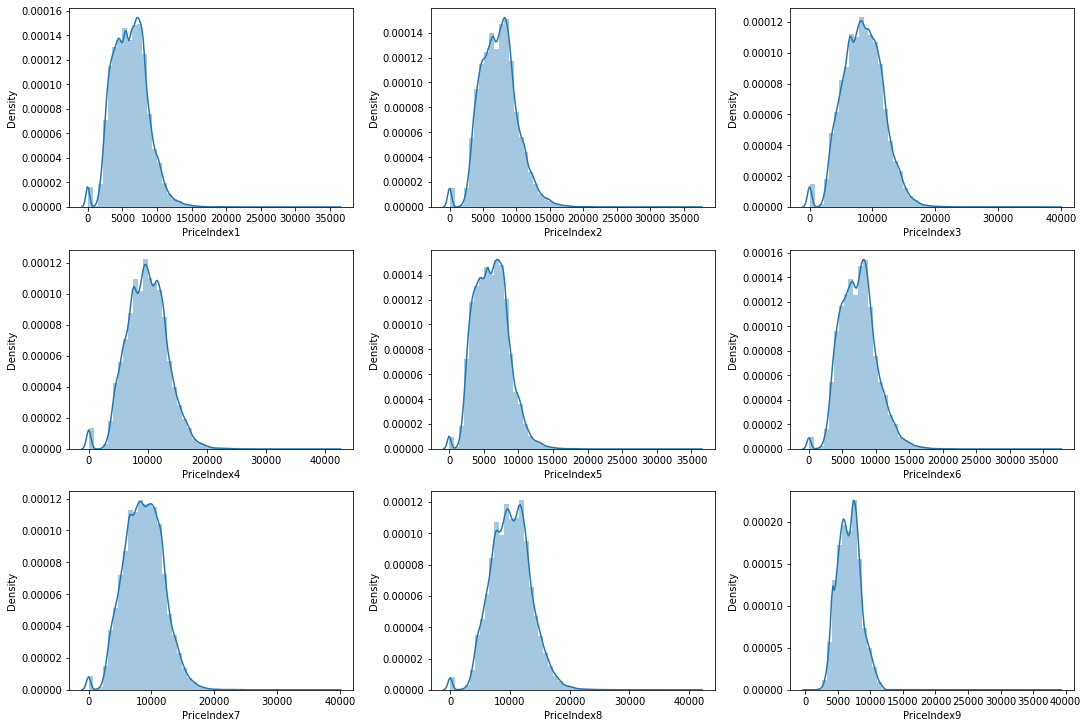

In [ ]:
fig, axes = plt.subplots(3, 3, constrained_layout = True, figsize = (15,10))
for i in range(0,9):
  sns.distplot(train['PriceIndex'+str(i+1)], ax = axes[round(np.floor(i/3)), i%3])

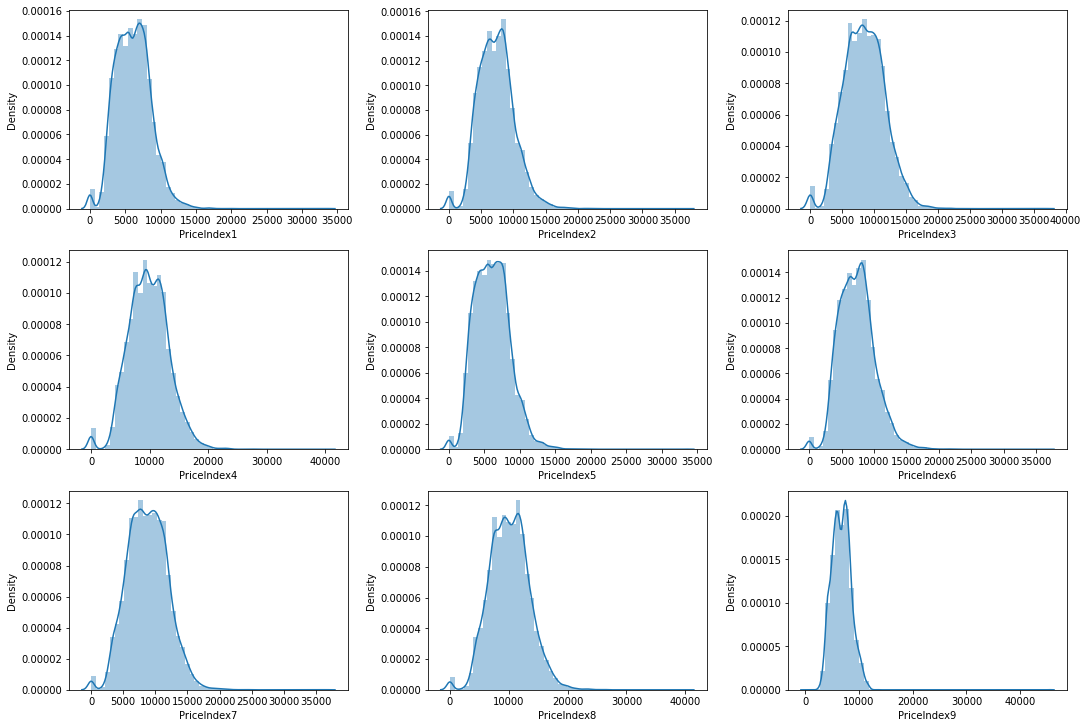

In [ ]:
fig, axes = plt.subplots(3, 3, constrained_layout = True, figsize = (15,10))
for i in range(0,9):
  sns.distplot(test['PriceIndex'+str(i+1)], ax = axes[round(np.floor(i/3)), i%3])

From the plots of PriceIndex of various columns we found out that the prices are right skewed, and contains outliers. 

Due to which measures of central tendency will be affected.

Firstly, we will deal with the null values in these columns and then combine to form one of it.

In [ ]:
for i in train.columns:
  if train[i].dtypes == 'O':
    print(i)

InteriorsStyle
ListDate
Material
Agency
AreaIncomeType
EnvRating
PRIMEUNIT
Channel
PlotType
Architecture
Region
SubModel
Facade
State
RegionType


###Data Preprocessing

First handling AreaIncomeType

In [ ]:
train.groupby(['ExpeditedListing'])['AreaIncomeType'].value_counts(normalize = True).round(3)

ExpeditedListing  AreaIncomeType
0                 A                 0.514
                  B                 0.475
                  C                 0.011
1                 A                 0.547
                  B                 0.440
                  C                 0.013
Name: AreaIncomeType, dtype: float64

In [ ]:
test.groupby(['ExpeditedListing'])['AreaIncomeType'].value_counts(normalize = True).round(3)

ExpeditedListing  AreaIncomeType
0                 A                 0.525
                  B                 0.464
                  C                 0.011
1                 A                 0.503
                  B                 0.483
                  C                 0.014
Name: AreaIncomeType, dtype: float64

AreaIncomeType is distributed acoording to ExpeditedListing in following percentile.

We will create random values for AreaIncomeType using the following percentiles, so that the distribution do not get affected when replacing NaN values with these randoms

In [22]:
df = pd.DataFrame(train.groupby(['ExpeditedListing'])['AreaIncomeType'].value_counts(normalize = True).round(3))
df = df.rename(columns = {'AreaIncomeType': 'Percentile'})
df = df.reset_index()
dff = pd.DataFrame(train[train['AreaIncomeType'].isnull()]['ExpeditedListing'].value_counts())
dff = dff.reset_index()
dff = dff.rename(columns = {'index':'ExpeditedListing', 'ExpeditedListing':'Null'})
z = pd.merge(df, dff)
z

,ExpeditedListing,AreaIncomeType,Percentile,Null
0,0,A,0.514,2579
1,0,B,0.475,2579
2,0,C,0.011,2579
3,1,A,0.547,97
4,1,B,0.440,97
5,1,C,0.013,97


In [23]:
df_test = pd.DataFrame(test.groupby(['ExpeditedListing'])['AreaIncomeType'].value_counts(normalize = True).round(3))
df_test = df_test.rename(columns = {'AreaIncomeType': 'Percentile'})
df_test = df_test.reset_index()
dff_test = pd.DataFrame(test[test['AreaIncomeType'].isnull()]['ExpeditedListing'].value_counts())
dff_test = dff_test.reset_index()
dff_test = dff_test.rename(columns = {'index':'ExpeditedListing', 'ExpeditedListing':'Null'})
z_test = pd.merge(df_test, dff_test)
z_test

,ExpeditedListing,AreaIncomeType,Percentile,Null
0,0,A,0.525,476
1,0,B,0.464,476
2,0,C,0.011,476
3,1,A,0.503,22
4,1,B,0.483,22
5,1,C,0.014,22


If ExpeditedListing is $0$, then Null values are 2579.

If ExpeditedListing is $1$, then Null values are 97.

In [24]:
import random
from collections import Counter
for i in [0,1]:    #first 'for' loop is only to run 0 and 1 as ExpeditedListing consists only two values.
  map_dict = {}
  for j in range(z.shape[0]):
    if z['ExpeditedListing'][j] == i:
      map_dict.update({df['AreaIncomeType'][j] : round(df['Percentile'][j]*100, 3)})  #this loop creates a dict for percentile values as seen above for 0 and 1 values respectively.
  #print(map_dict)
  k = list(map_dict.values())  #k stores the value of the dict.keys-> values
  #print(k)  #to confirm print the results by removing the print statements from comment
  def weighted_random():    
    r = random.randint(1, 100)    #function generate random values according to the k values 
    if r < k[0]:
        return 'A'
    elif k[0] <= r < k[0]+k[1]:
        return 'B'
    elif k[0]+k[1] <= r <= k[0]+k[1]+k[2]:
        return 'C'
  list_map = [weighted_random() for _ in range(1,z['Null'].unique()[i]+1)]  #it stores the values generate to map according to 0 and 1
  results = Counter(list_map)
  #print(results)
  #print(list_map)
  def dict_map(n):
    if (n == 'A'):
      return 1
    elif (n == 'B'):
      return 2
    elif (n == 'C'):
      return 3
  list_map_copy = list(map(dict_map, list_map))
  #print(list_map_copy)
  #print(len(list_map_copy))
  x = train[train['AreaIncomeType'].isnull()].index   #x contains the index values where the nan values are present in the column
  x = list(x)
  #print(x)
  #print(len(x))
  t = 0
  for u in x:
    if(train['ExpeditedListing'][u] == i):
      train['AreaIncomeType'][u] = list_map_copy[t]
      t = t+1
  #print(train['AreaIncomeType'].isnull().sum())
  def mapp_dict(dat):
    if dat == 1:
      return 'A'
    elif dat == 2:
      return 'B'
    elif dat == 3:
      return 'C'
    else :
      return dat
    
  train['AreaIncomeType'] = train['AreaIncomeType'].map(mapp_dict)

In [25]:
import random
from collections import Counter
for i in [0,1]:    #first 'for' loop is only to run 0 and 1 as ExpeditedListing consists only two values.
  map_dict_test = {}
  for j in range(z_test.shape[0]):
    if z_test['ExpeditedListing'][j] == i:
      map_dict_test.update({df_test['AreaIncomeType'][j] : round(df['Percentile'][j]*100, 3)})  #this loop creates a dict for percentile values as seen above for 0 and 1 values respectively.
  #print(map_dict)
  k_test = list(map_dict_test.values())  #k stores the value of the dict.keys-> values
  #print(k)  #to confirm print the results by removing the print statements from comment
  def weighted_random():    
    r_test = random.randint(1, 100)    #function generate random values according to the k values 
    if r_test < k_test[0]:
        return 'A'
    elif k_test[0] <= r_test < k_test[0]+k_test[1]:
        return 'B'
    elif k_test[0]+k_test[1] <= r_test <= k_test[0]+k_test[1]+k_test[2]:
        return 'C'
  list_map_test = [weighted_random() for _ in range(1,z_test['Null'].unique()[i]+1)]  #it stores the values generate to map according to 0 and 1
  results = Counter(list_map_test)
  #print(results)
  #print(list_map)
  def dict_map(n):
    if (n == 'A'):
      return 1
    elif (n == 'B'):
      return 2
    elif (n == 'C'):
      return 3
  list_map_copy = list(map(dict_map, list_map_test))
  #print(list_map_copy)
  #print(len(list_map_copy))
  x = test[test['AreaIncomeType'].isnull()].index   #x contains the index values where the nan values are present in the column
  x = list(x)
  #print(x)
  #print(len(x))
  t = 0
  for u in x:
    if(test['ExpeditedListing'][u] == i):
      test['AreaIncomeType'][u] = list_map_copy[t]
      t = t+1
  #print(train['AreaIncomeType'].isnull().sum())
  def mapp_dict(dat):
    if dat == 1:
      return 'A'
    elif dat == 2:
      return 'B'
    elif dat == 3:
      return 'C'
    else :
      return dat
    
  test['AreaIncomeType'] = test['AreaIncomeType'].map(mapp_dict)

In [ ]:
print(train.groupby(['ExpeditedListing'])['AreaIncomeType'].value_counts(normalize = True).round(3))

ExpeditedListing  AreaIncomeType
0                 A                 0.513
                  B                 0.476
                  C                 0.011
1                 A                 0.545
                  B                 0.442
                  C                 0.013
Name: AreaIncomeType, dtype: float64


In [ ]:
print(test.groupby(['ExpeditedListing'])['AreaIncomeType'].value_counts(normalize = True).round(3))

ExpeditedListing  AreaIncomeType
0                 A                 0.524
                  B                 0.465
                  C                 0.011
1                 B                 0.497
                  A                 0.490
                  C                 0.013
Name: AreaIncomeType, dtype: float64


After filling the NaN values, the result remains the same. Hence, the distribution is not affected.

In [26]:
train[price_lst].isnull().sum()

PriceIndex8    272
PriceIndex9      0
PriceIndex7    272
PriceIndex4     14
PriceIndex1     14
PriceIndex6    272
PriceIndex3     14
PriceIndex5    272
PriceIndex2     14
dtype: int64

In [27]:
test[price_lst_test].isnull().sum()

PriceIndex8    43
PriceIndex9     0
PriceIndex7    43
PriceIndex4     4
PriceIndex1     4
PriceIndex6    43
PriceIndex3     4
PriceIndex5    43
PriceIndex2     4
dtype: int64

In [28]:
for i in price_lst:
  Q1 = train[i].quantile(.25)
  Q3 = train[i].quantile(.75)
  IQR = Q3-Q1
  low = Q1 - (1.5*IQR)
  high = Q3 + (1.5*IQR)
  for j in range(train.shape[0]):
    if (train[i][j]>low and train[i][j]<high):
      pass
    else:
      train[i][j] = np.nan
  train[i] = train[i].fillna(train[i].median())

In [29]:
for i in price_lst_test:
  Q1 = test[i].quantile(.25)
  Q3 = test[i].quantile(.75)
  IQR = Q3-Q1
  low = Q1 - (1.5*IQR)
  high = Q3 + (1.5*IQR)
  for j in range(test.shape[0]):
    if (test[i][j]>low and test[i][j]<high):
      pass
    else:
      test[i][j] = np.nan
  test[i] = test[i].fillna(test[i].median())

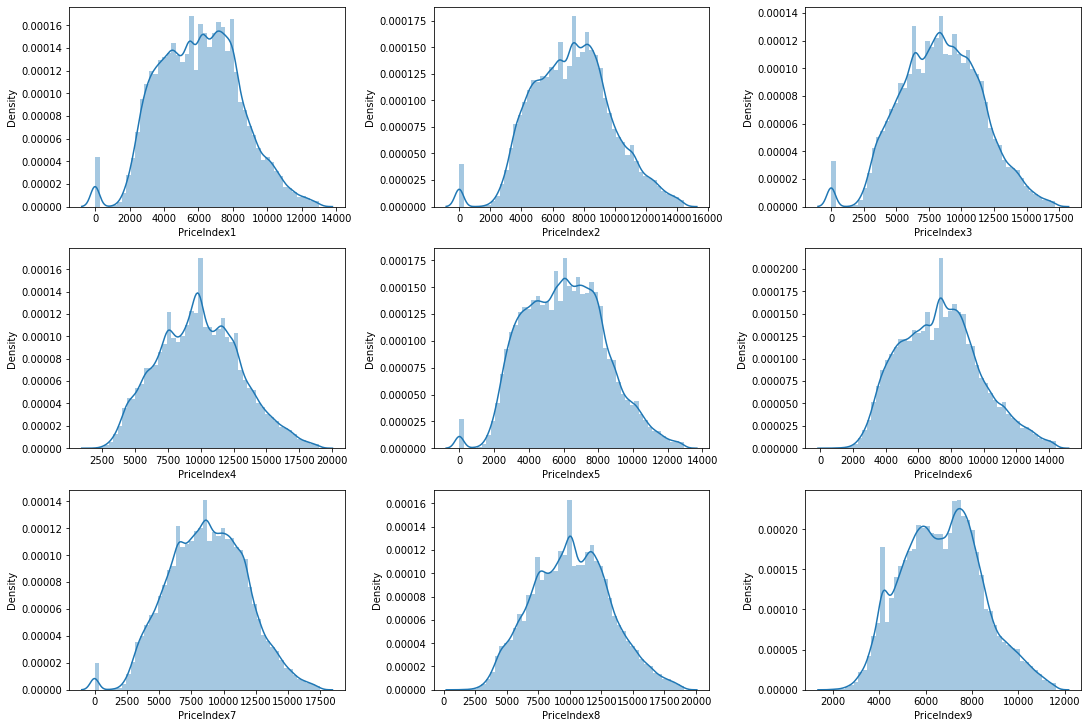

In [ ]:
fig, axes = plt.subplots(3, 3, constrained_layout = True, figsize = (15,10))
for i in range(0,9):
  sns.distplot(train['PriceIndex'+str(i+1)], ax = axes[round(np.floor(i/3)), i%3])

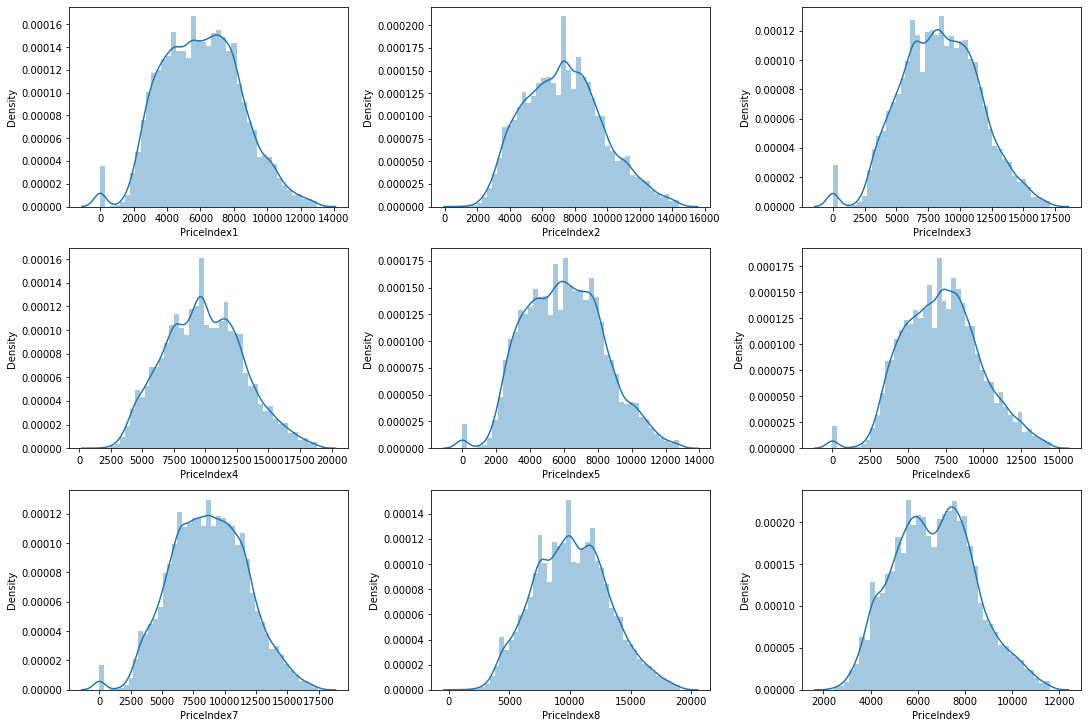

In [ ]:
fig, axes = plt.subplots(3, 3, constrained_layout = True, figsize = (15,10))
for i in range(0,9):
  sns.distplot(test['PriceIndex'+str(i+1)], ax = axes[round(np.floor(i/3)), i%3])

Now PriceIndex columns have been treated to produce generalised normal distribution.

In [ ]:
train.isnull().sum()

Junk                         0
InteriorsStyle               0
PriceIndex8                  0
ListDate                     0
Material                     0
PriceIndex9                  0
Agency                       5
AreaIncomeType               0
EnvRating                59092
PriceIndex7                  0
ExpeditedListing             0
PriceIndex4                  0
PriceIndex1                  0
PriceIndex6                  0
PRIMEUNIT                59092
Channel                      0
Zip                          0
InsurancePremiumIndex        0
PlotType                     0
Architecture                 0
PriceIndex3                  0
Region                       6
PriceIndex5                  0
SubModel                     0
Facade                       5
State                        0
NormalisedPopulation         0
BuildYear                    0
RegionType                   5
PropertyAge                  0
PriceIndex2                  0
dtype: int64

In [ ]:
test.isnull().sum()

InteriorsStyle               0
PriceIndex8                  0
ListDate                     0
Material                     0
PriceIndex9                  0
Agency                       0
AreaIncomeType               0
EnvRating                10472
PriceIndex7                  0
ExpeditedListing             0
PriceIndex4                  0
PriceIndex1                  0
PriceIndex6                  0
PRIMEUNIT                10472
Channel                      0
Zip                          0
InsurancePremiumIndex        0
PlotType                     0
Architecture                 0
PriceIndex3                  0
Region                       3
PriceIndex5                  0
SubModel                     0
Facade                       3
State                        0
NormalisedPopulation         0
BuildYear                    0
RegionType                   0
PropertyAge                  0
PriceIndex2                  0
dtype: int64

$Agency$, $Region$, $Facade$ and $RegionType$ have some null values.

In [30]:
for i in ['Agency', 'Region', 'Facade', 'RegionType']:
  print(train[i].value_counts())
  print()

CAT1     21545
CAT2     19862
CAT3     10455
OTHER    10168
Name: Agency, dtype: int64

A    59869
B     2160
Name: Region, dtype: int64

SILVER       12705
WHITE        10297
BLUE          8807
GREY          6668
BLACK         6497
RED           5300
GOLD          4431
GREEN         2669
MAROON        1764
BEIGE         1351
BROWN          380
ORANGE         350
PURPLE         325
OTHER          207
YELLOW         200
NOT AVAIL       79
Name: Facade, dtype: int64

A        51862
B         6861
C         3135
OTHER      172
Name: RegionType, dtype: int64



In [ ]:
for i in ['Agency', 'Region', 'Facade', 'RegionType']:
  print(test[i].value_counts())
  print()

CAT1     3769
CAT2     3537
CAT3     1860
OTHER    1782
Name: Agency, dtype: int64

A    10529
B      416
Name: Region, dtype: int64

SILVER       2170
WHITE        1826
BLUE         1540
GREY         1219
BLACK        1130
RED           957
GOLD          800
GREEN         525
MAROON        282
BEIGE         233
ORANGE         65
BROWN          56
PURPLE         48
YELLOW         44
OTHER          35
NOT AVAIL      15
Name: Facade, dtype: int64

A        9166
B        1172
C         587
OTHER      23
Name: RegionType, dtype: int64



We will fill the null values by the mode values of these columns.

In [31]:
train['Agency'] = train['Agency'].fillna('CAT1')
train['Region'] = train['Region'].fillna('A')
train['Facade'] = train['Facade'].fillna('SILVER')
train['RegionType'] = train['RegionType'].fillna('A')

In [32]:
test['Agency'] = test['Agency'].fillna('CAT1')
test['Region'] = test['Region'].fillna('A')
test['Facade'] = test['Facade'].fillna('SILVER')
test['RegionType'] = test['RegionType'].fillna('A')

In [33]:
train['PriceIndex'] = round((train['PriceIndex8'] + train['PriceIndex9'] + train['PriceIndex7'] + train['PriceIndex4'] + train['PriceIndex1'] + train['PriceIndex6'] + train['PriceIndex3'] + train['PriceIndex5'] + train['PriceIndex2']) / 9, 3)

In [34]:
test['PriceIndex'] = round((test['PriceIndex8'] + test['PriceIndex9'] + test['PriceIndex7'] + test['PriceIndex4'] + test['PriceIndex1'] + test['PriceIndex6'] + test['PriceIndex3'] + test['PriceIndex5'] + test['PriceIndex2']) / 9, 3)

In [ ]:
train.head()

,Junk,InteriorsStyle,PriceIndex8,ListDate,Material,PriceIndex9,Agency,AreaIncomeType,EnvRating,PriceIndex7,ExpeditedListing,PriceIndex4,PriceIndex1,PriceIndex6,PRIMEUNIT,Channel,Zip,InsurancePremiumIndex,PlotType,Architecture,PriceIndex3,Region,PriceIndex5,SubModel,Facade,State,NormalisedPopulation,BuildYear,RegionType,PropertyAge,PriceIndex2,PriceIndex
0,0,6LLJ,14674.0,9/7/2010,UT7W,8270.0,CAT3,B,NaN,13143.0,0,14224.0,9217.0,10387.0,NaN,Direct,21075,623,WHBI,I3Z9,13108.0,A,9022.0,6E9G,GREEN,MD,42077,2008,A,2,10692.0,11415.222
1,1,XZ9F,4172.0,1/7/2009,PRN0,3890.0,CAT2,B,NaN,3461.0,0,4404.0,2958.0,3400.0,NaN,Direct,73129,1689,WHBI,AVYP,3695.0,A,2742.0,FIVQ,SILVER,OK,77258,2002,A,7,3615.0,3593.000
2,0,QWEV,8210.0,6/23/2010,A9RA,5900.0,CAT1,B,NaN,6922.0,0,8952.0,4568.0,4862.0,NaN,Other,29697,2351,W62B,1M5X,7730.0,A,3768.0,4K0H,SILVER,SC,94514,2004,A,6,5805.0,6301.889
3,0,MK2K,7309.0,3/19/2009,RRJQ,7460.0,OTHER,A,NaN,6300.0,0,7460.0,5361.0,6305.0,NaN,Agent,28273,1933,WLQ6,DKOO,6290.0,A,5370.0,ZLXY,WHITE,NC,82302,2002,C,7,6444.0,6477.667
4,0,GK4G,9182.0,3/3/2010,HE5A,6400.0,OTHER,B,NaN,8330.0,0,9846.0,5428.0,5718.0,NaN,Other,29697,482,WHBI,KML6,8583.0,A,4803.0,FIVQ,SILVER,SC,49176,2007,B,3,6286.0,7175.111


In [ ]:
test.head()

,InteriorsStyle,PriceIndex8,ListDate,Material,PriceIndex9,Agency,AreaIncomeType,EnvRating,PriceIndex7,ExpeditedListing,PriceIndex4,PriceIndex1,PriceIndex6,PRIMEUNIT,Channel,Zip,InsurancePremiumIndex,PlotType,Architecture,PriceIndex3,Region,PriceIndex5,SubModel,Facade,State,NormalisedPopulation,BuildYear,RegionType,PropertyAge,PriceIndex2,PriceIndex
0,6LLJ,10645.0,9/22/2010,ZCI3,6015.0,CAT3,A,NaN,9568.0,0,12432.0,6986.0,7133.0,NaN,Other,27407,728,WHBI,I3Z9,10860.0,B,5911.0,UA42,BLUE,NC,67549,2006,A,4,8311.0,8651.222
1,QD0H,9891.0,3/12/2010,RRJQ,7625.0,OTHER,A,NaN,8888.0,0,12173.0,5954.0,6544.0,NaN,Agent,32219,1334,32T2,4GZ4,10166.0,A,5370.0,BUNS,BLUE,FL,56570,2004,B,6,7123.0,8192.667
2,I7GR,8426.0,10/12/2009,ZCI3,6900.0,CAT2,B,NaN,7911.0,0,9134.0,7407.0,7339.0,NaN,Other,74135,754,WHBI,TP7R,8500.0,A,6862.0,8YTZ,BLACK,OK,51840,2008,A,1,7994.0,7830.333
3,5KS5,9269.0,5/20/2010,PRN0,6475.0,CAT1,B,NaN,7773.0,0,8500.0,4241.0,6143.0,NaN,Other,80229,1373,WHBI,YIK5,7294.0,A,4872.0,FIVQ,GREEN,CO,83300,2005,A,5,5259.0,6647.333
4,918O,5366.0,1/13/2009,C8A4,3960.0,CAT1,A,NaN,4134.0,0,5211.0,3352.0,4506.0,NaN,Direct,28625,2939,WHBI,YIK5,4120.0,A,3365.0,KT8F,BLACK,NC,95035,2003,A,6,4362.0,4264.000


In [35]:
remove_cols = ['ListDate', 'EnvRating', 'PRIMEUNIT', 'BuildYear', 'NormalisedPopulation'] + price_lst
mean_encode_cols = ['InteriorsStyle', 'Material', 'Zip', 'SubModel', 'State', 'PlotType', 'Architecture', 'Facade']
pd_dummies = ['Agency', 'AreaIncomeType', 'Channel', 'Region', 'RegionType']
scaling_cols = ['InsurancePremiumIndex', 'PriceIndex', 'PropertyAge']

$Remove~Columns$ -> The columns which do not play any significant role in the dataset.

$Mean~Encoding~Columns$ -> The columns in which there we apply mean encoding as they contain very large number of categories.

$Dummy~Columns$ -> The columns which are converted to dummies columns.

$Scaling~Columns$ -> The columns in which StandardScaler method will be applied to transform to normal distribution.

In [36]:
train = train.drop(remove_cols, axis = 1)
train.head()

,Junk,InteriorsStyle,Material,Agency,AreaIncomeType,ExpeditedListing,Channel,Zip,InsurancePremiumIndex,PlotType,Architecture,Region,SubModel,Facade,State,RegionType,PropertyAge,PriceIndex
0,0,6LLJ,UT7W,CAT3,B,0,Direct,21075,623,WHBI,I3Z9,A,6E9G,GREEN,MD,A,2,11415.222
1,1,XZ9F,PRN0,CAT2,B,0,Direct,73129,1689,WHBI,AVYP,A,FIVQ,SILVER,OK,A,7,3593.000
2,0,QWEV,A9RA,CAT1,B,0,Other,29697,2351,W62B,1M5X,A,4K0H,SILVER,SC,A,6,6301.889
3,0,MK2K,RRJQ,OTHER,A,0,Agent,28273,1933,WLQ6,DKOO,A,ZLXY,WHITE,NC,C,7,6477.667
4,0,GK4G,HE5A,OTHER,B,0,Other,29697,482,WHBI,KML6,A,FIVQ,SILVER,SC,B,3,7175.111


In [37]:
test = test.drop(remove_cols, axis = 1)
test.head()

,InteriorsStyle,Material,Agency,AreaIncomeType,ExpeditedListing,Channel,Zip,InsurancePremiumIndex,PlotType,Architecture,Region,SubModel,Facade,State,RegionType,PropertyAge,PriceIndex
0,6LLJ,ZCI3,CAT3,A,0,Other,27407,728,WHBI,I3Z9,B,UA42,BLUE,NC,A,4,8651.222
1,QD0H,RRJQ,OTHER,A,0,Agent,32219,1334,32T2,4GZ4,A,BUNS,BLUE,FL,B,6,8192.667
2,I7GR,ZCI3,CAT2,B,0,Other,74135,754,WHBI,TP7R,A,8YTZ,BLACK,OK,A,1,7830.333
3,5KS5,PRN0,CAT1,B,0,Other,80229,1373,WHBI,YIK5,A,FIVQ,GREEN,CO,A,5,6647.333
4,918O,C8A4,CAT1,A,0,Direct,28625,2939,WHBI,YIK5,A,KT8F,BLACK,NC,A,6,4264.000


In [38]:
for i in mean_encode_cols:
  mean_encoder = train[i].value_counts(normalize = True).round(4)
  train['mean_' + i] = train[i].map(mean_encoder)
  train = train.drop(i, axis = 1)

train.head()

,Junk,Agency,AreaIncomeType,ExpeditedListing,Channel,InsurancePremiumIndex,Region,RegionType,PropertyAge,PriceIndex,mean_InteriorsStyle,mean_Material,mean_Zip,mean_SubModel,mean_State,mean_PlotType,mean_Architecture,mean_Facade
0,0,CAT3,B,0,Direct,623,A,A,2,11415.222,0.0053,0.0086,0.0135,0.0073,0.0161,0.4224,0.1545,0.0430
1,1,CAT2,B,0,Direct,1689,A,A,7,3593.000,0.0029,0.1920,0.0007,0.2097,0.0497,0.4224,0.1216,0.2049
2,0,CAT1,B,0,Other,2351,A,A,6,6301.889,0.0124,0.0112,0.0275,0.0069,0.0585,0.1221,0.0590,0.2049
3,0,OTHER,A,0,Agent,1933,A,C,7,6477.667,0.0000,0.0291,0.0259,0.0000,0.0958,0.0802,0.0069,0.1660
4,0,OTHER,B,0,Other,482,A,B,3,7175.111,0.0088,0.0321,0.0275,0.2097,0.0585,0.4224,0.0182,0.2049


In [39]:
for i in mean_encode_cols:
  mean_encoder = test[i].value_counts(normalize = True).round(4)
  test['mean_' + i] = test[i].map(mean_encoder)
  test = test.drop(i, axis = 1)

test.head()

,Agency,AreaIncomeType,ExpeditedListing,Channel,InsurancePremiumIndex,Region,RegionType,PropertyAge,PriceIndex,mean_InteriorsStyle,mean_Material,mean_Zip,mean_SubModel,mean_State,mean_PlotType,mean_Architecture,mean_Facade
0,CAT3,A,0,Other,728,B,A,4,8651.222,0.0067,0.1288,0.0082,0.0524,0.1003,0.4184,0.1572,0.1407
1,OTHER,A,0,Agent,1334,A,B,6,8192.667,0.0026,0.0287,0.0090,0.0048,0.1433,0.1143,0.0355,0.1407
2,CAT2,B,0,Other,754,A,A,1,7830.333,0.0054,0.1288,0.0294,0.0307,0.0464,0.4184,0.1803,0.1032
3,CAT1,B,0,Other,1373,A,A,5,6647.333,0.0094,0.1864,0.0098,0.2035,0.0660,0.4184,0.2377,0.0480
4,CAT1,A,0,Direct,2939,A,A,6,4264.000,0.0022,0.1386,0.0164,0.0645,0.1003,0.4184,0.2377,0.1032


In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

dff = pd.DataFrame(scaler.fit_transform(train[['InsurancePremiumIndex', 'PriceIndex', 'PropertyAge']]), columns = ['InsurancePremiumIndex_scaled','PriceIndex_scaled','PropertyAge_scaled']).reset_index(drop = True)
dff
train = train.reset_index(drop = True)
train = pd.concat([train, dff], axis = 1)

train = train.drop(scaling_cols, axis = 1)
train.head()

,Junk,Agency,AreaIncomeType,ExpeditedListing,Channel,Region,RegionType,mean_InteriorsStyle,mean_Material,mean_Zip,mean_SubModel,mean_State,mean_PlotType,mean_Architecture,mean_Facade,InsurancePremiumIndex_scaled,PriceIndex_scaled,PropertyAge_scaled
0,0,CAT3,B,0,Direct,A,A,0.0053,0.0086,0.0135,0.0073,0.0161,0.4224,0.1545,0.0430,-1.089057,1.455362,-1.270922
1,1,CAT2,B,0,Direct,A,A,0.0029,0.1920,0.0007,0.2097,0.0497,0.4224,0.1216,0.2049,0.685294,-1.743681,1.655165
2,0,CAT1,B,0,Other,A,A,0.0124,0.0112,0.0275,0.0069,0.0585,0.1221,0.0590,0.2049,1.787190,-0.635830,1.069947
3,0,OTHER,A,0,Agent,A,C,0.0000,0.0291,0.0259,0.0000,0.0958,0.0802,0.0069,0.1660,1.091431,-0.563943,1.655165
4,0,OTHER,B,0,Other,A,B,0.0088,0.0321,0.0275,0.2097,0.0585,0.4224,0.0182,0.2049,-1.323751,-0.278710,-0.685705


In [41]:
dff_test = pd.DataFrame(scaler.fit_transform(test[['InsurancePremiumIndex', 'PriceIndex', 'PropertyAge']]), columns = ['InsurancePremiumIndex_scaled','PriceIndex_scaled','PropertyAge_scaled']).reset_index(drop = True)
dff_test
test = test.reset_index(drop = True)
test = pd.concat([test, dff_test], axis = 1)

test = test.drop(scaling_cols, axis = 1)
test.head()

,Agency,AreaIncomeType,ExpeditedListing,Channel,Region,RegionType,mean_InteriorsStyle,mean_Material,mean_Zip,mean_SubModel,mean_State,mean_PlotType,mean_Architecture,mean_Facade,InsurancePremiumIndex_scaled,PriceIndex_scaled,PropertyAge_scaled
0,CAT3,A,0,Other,B,A,0.0067,0.1288,0.0082,0.0524,0.1003,0.4184,0.1572,0.1407,-0.926612,0.331613,-0.118182
1,OTHER,A,0,Agent,A,B,0.0026,0.0287,0.0090,0.0048,0.1433,0.1143,0.0355,0.1407,0.104505,0.143809,1.037051
2,CAT2,B,0,Other,A,A,0.0054,0.1288,0.0294,0.0307,0.0464,0.4184,0.1803,0.1032,-0.882373,-0.004588,-1.851033
3,CAT1,B,0,Other,A,A,0.0094,0.1864,0.0098,0.2035,0.0660,0.4184,0.2377,0.0480,0.170864,-0.489094,0.459434
4,CAT1,A,0,Direct,A,A,0.0022,0.1386,0.0164,0.0645,0.1003,0.4184,0.2377,0.1032,2.835434,-1.465205,1.037051


In [42]:
for col in pd_dummies:
  c = pd.get_dummies(train[col], drop_first = True, prefix = col)
  train = pd.concat([train, c], axis = 1)
  train = train.drop(col, axis = 1)

In [43]:
for col in pd_dummies:
  c = pd.get_dummies(test[col], drop_first = True, prefix = col)
  test = pd.concat([test, c], axis = 1)
  test = test.drop(col, axis = 1)

In [ ]:
train.head()

,Junk,ExpeditedListing,mean_InteriorsStyle,mean_Material,mean_Zip,mean_SubModel,mean_State,mean_PlotType,mean_Architecture,mean_Facade,InsurancePremiumIndex_scaled,PriceIndex_scaled,PropertyAge_scaled,Agency_CAT2,Agency_CAT3,Agency_OTHER,AreaIncomeType_B,AreaIncomeType_C,Channel_Direct,Channel_Other,Region_B,RegionType_B,RegionType_C,RegionType_OTHER
0,0,0,0.0053,0.0086,0.0135,0.0073,0.0161,0.4224,0.1545,0.0430,-1.089057,1.455362,-1.270922,0,1,0,1,0,1,0,0,0,0,0
1,1,0,0.0029,0.1920,0.0007,0.2097,0.0497,0.4224,0.1216,0.2049,0.685294,-1.743681,1.655165,1,0,0,1,0,1,0,0,0,0,0
2,0,0,0.0124,0.0112,0.0275,0.0069,0.0585,0.1221,0.0590,0.2049,1.787190,-0.635830,1.069947,0,0,0,1,0,0,1,0,0,0,0
3,0,0,0.0000,0.0291,0.0259,0.0000,0.0958,0.0802,0.0069,0.1660,1.091431,-0.563943,1.655165,0,0,1,0,0,0,0,0,0,1,0
4,0,0,0.0088,0.0321,0.0275,0.2097,0.0585,0.4224,0.0182,0.2049,-1.323751,-0.278710,-0.685705,0,0,1,1,0,0,1,0,1,0,0


In [ ]:
print(train.shape)
print(test.shape)

(62035, 24)
(10948, 23)


#Building the Model

In [ ]:
train['Junk'].value_counts(normalize = True)

0    0.877456
1    0.122544
Name: Junk, dtype: float64

The dataset contains imbalanced classification of the target variable.

$0$ -> is classified 87% of the total junk property, means not a Junk Property.

$1$ -> is classifired 12% of total junk property, means a Junk Property.

To handle an Imbalance Data, we can approach by two methods, eitheir by UnderSampling or by OverSampling using SMOTETomek library.

##UnderSampling Method

$What~is~Near-Miss~Algorithm~?$

$Near-miss$ is an algorithm that can help in balancing an imbalanced dataset. 

It can be grouped under undersampling algorithms and is an efficient way to balance the data. The algorithm does this by looking at the class distribution and randomly eliminating samples from the larger class. When two points belonging to different classes are very close to each other in the distribution, this algorithm eliminates the datapoint of the larger class thereby trying to balance the distribution. 

For this method, we import a library called as *$imblearn$* a.k.a imbalance learn.

In [44]:
from imblearn.under_sampling import NearMiss

In [45]:
X = train.drop('Junk', axis = 1)
y = train['Junk']
nm = NearMiss()
X_res,y_res = nm.fit_resample(X,y)

X_res.shape,y_res.shape

((15204, 23), (15204,))

###Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#X = train.drop(['Junk'], axis = 1)
#y = train['Junk']
X_train, X_val, y_train, y_val = train_test_split(X_res,y_res, test_size = .2, random_state = 1)

In [49]:
print(X_train.shape)
print(X_val.shape)

(12163, 23)
(3041, 23)


In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [51]:
rfe_model = RFE(estimator = LogisticRegression())
params = {'n_features_to_select' : list(np.arange(1, 24))}
rd_cv = RandomizedSearchCV(rfe_model, param_distributions = params, scoring = 'roc_auc', cv = 10)
rd_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RFE(estimator=LogisticRegression()),
                   param_distributions={'n_features_to_select': [1, 2, 3, 4, 5,
                                                                 6, 7, 8, 9, 10,
                                                                 11, 12, 13, 14,
                                                                 15, 16, 17, 18,
                                                                 19, 20, 21, 22,
                                                                 23]},
                   scoring='roc_auc')

In [52]:
print(rd_cv.best_params_)
print(rd_cv.best_score_)

{'n_features_to_select': 21}
0.8137046072733429


In [53]:
final_log_model = RFE(estimator = LogisticRegression(), n_features_to_select = 21)
final_log_model.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=21)

In [54]:
y_log_pred = final_log_model.predict(X_val)
roc_auc_score(y_val, y_log_pred)

0.7521380056240536

We get the ROC Score upto .75 which is good.

Using different methods to better our score.

###RandomForest

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [56]:
forest_model = RandomForestClassifier()
params = {'n_estimators':[100,102,105,107,110]}

forest_model = RandomizedSearchCV(forest_model,param_distributions=params,scoring = 'roc_auc',cv = 10)
forest_model.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'n_estimators': [100, 102, 105, 107,
                                                         110]},
                   scoring='roc_auc')

In [57]:
print(forest_model.best_score_)
print(forest_model.best_params_)

0.8693178017151887
{'n_estimators': 102}


In [58]:
final_forest_model = RandomForestClassifier(n_estimators=102)
final_forest_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=102)

In [59]:
y_forest_pred = final_forest_model.predict(X_val)
roc_auc_score(y_val, y_forest_pred)

0.805206792126325

In [60]:
y_test_pred = final_forest_model.predict(test)
y_test_pred

array([1, 1, 0, ..., 1, 0, 1])

In [61]:
submission = pd.DataFrame({'Junk': final_forest_model.predict_proba(test)[:,1]})
submission.to_csv('Rajat_Bisht_P2.csv', index = False)

##OverSampling Method

$SMOTE$ : *Synthetic Minority Oversampling Technique*

---

SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.

In [ ]:
X = train.drop(['Junk'], axis = 1)
y = train['Junk']

In [ ]:
from imblearn.combine import SMOTETomek
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state = 23)
X_res,y_res = smk.fit_resample(X,y)


X_res.shape,y_res.shape

((106514, 23), (106514,))

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 54433, 1: 7602})
Resampled dataset shape Counter({0: 53257, 1: 53257})


###RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [ ]:
forest_model = RandomForestClassifier()
params = {'n_estimators':[2,5,10,25,35,50,75,100,105,110,115,120]}

forest_model = RandomizedSearchCV(forest_model,param_distributions=params,scoring = 'roc_auc',cv = 10)
forest_model.fit(X_res,y_res)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'n_estimators': [2, 5, 10, 25, 35, 50,
                                                         75, 100, 105, 110, 115,
                                                         120]},
                   scoring='roc_auc')

In [ ]:
print(forest_model.best_score_)
print(forest_model.best_params_)

0.9748659867189365
{'n_estimators': 120}


In [ ]:
final_forest_model = RandomForestClassifier(n_estimators=120)
final_forest_model.fit(X_res, y_res)

RandomForestClassifier(n_estimators=120)

In [ ]:
y_forest_pred = final_forest_model.predict(X_val)
roc_auc_score(y_val, y_forest_pred)

0.957801860263898

In [ ]:
y_test_pred = final_forest_model.predict(test)
y_test_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
submission = pd.DataFrame({'Junk': final_forest_model.predict_proba(test)[:,1]})
submission.to_csv('Rajat_Bisht_P2.csv', index = False)